In [28]:
import spectral_analysis as sa
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from math import floor

import importlib
import sys
module = sys.modules["spectral_analysis"]
importlib.reload(module)

<module 'spectral_analysis' from 'd:\\Users\\rewas\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\spectral_analysis.py'>

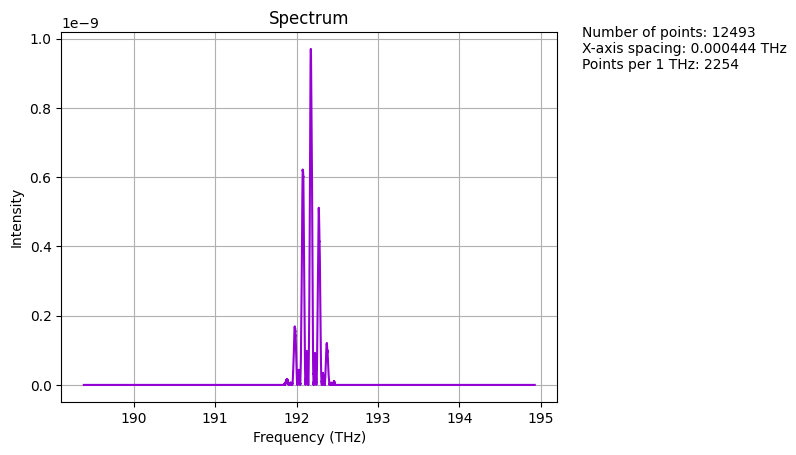

In [29]:
real_spectrum = sa.load_csv("data/5uW_not_sheared.csv")
real_spectrum.wl_to_freq()
real_spectrum.constant_spacing()
real_spectrum.increase_resolution(2)
real_spectrum.insert_zeroes(2)
#real_spectrum.moving_average(0.02)
real_spectrum.Y = np.abs(real_spectrum.Y) + 1e-14
sa.plot(real_spectrum)

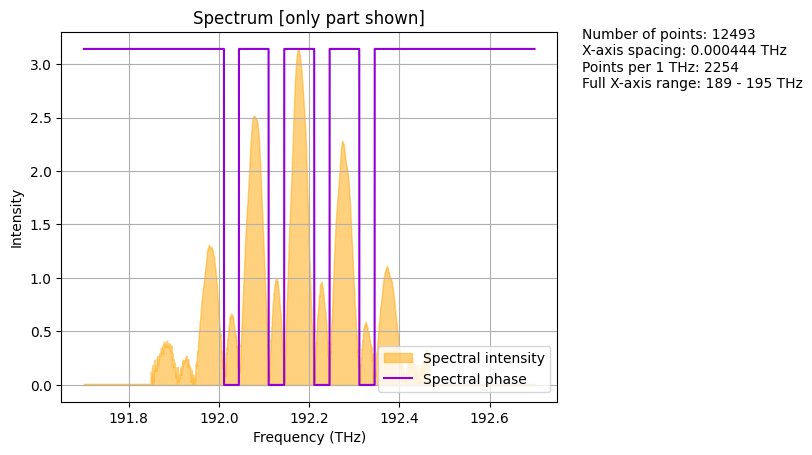

In [30]:
phase = []
for x in real_spectrum.X:
    if x < 192.011 or 192.044 <= x < 192.11 or 192.1445 <= x < 192.211 or 192.245 <= x < 192.311 or 192.345 <= x:
        phase.append(np.pi)
    else:
        phase.append(1e-6)
phase = np.array(phase)

modified_spectrum = real_spectrum.copy()

modified_spectrum.Y = np.sqrt(real_spectrum.Y) * np.exp(1j*phase)
sa.plot(modified_spectrum, what_to_plot= "trigonometric", start = 191.7, end = 192.7)

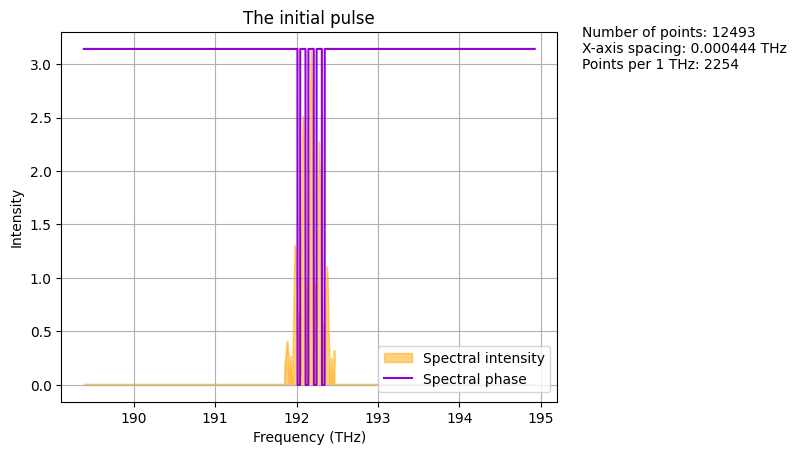

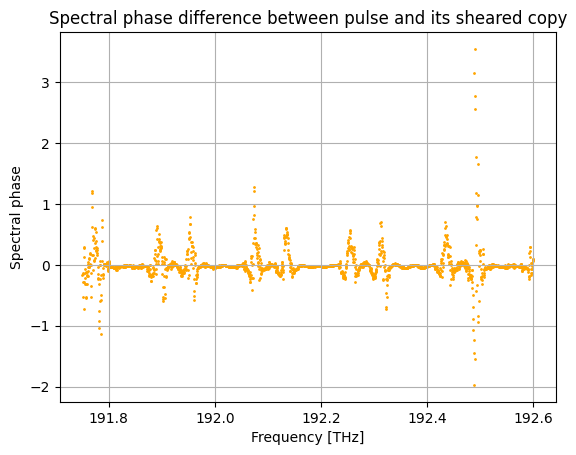

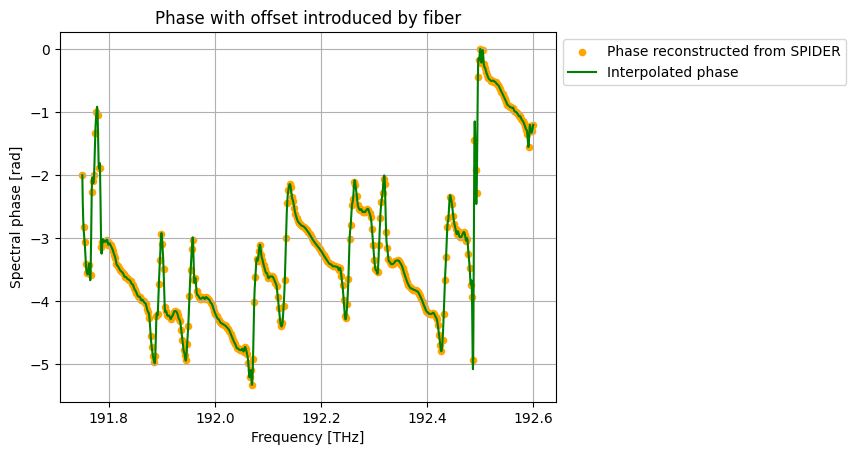

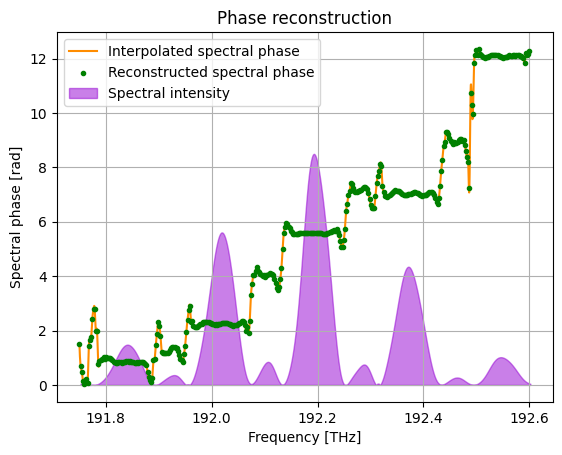

In [34]:
# prepare the input

pulse = modified_spectrum
zero_pulse = pulse.copy()
zero_pulse.Y = zero_pulse.Y*0
the_beam = sa.beam(pulse, zero_pulse)

# prepare the phase

for i in range(floor(len(phase)/4), floor(len(phase)/4*3)):
    break
    phase[i] = np.mean(phase[i-50: i+50])

sa.plot(the_beam.ver, what_to_plot = "trigonometric", title = "The initial pulse")

# simulation

for i in range(2):
    a_beam = the_beam.copy()
    a_beam.rotate(np.pi/4)
    a_beam.delay("ver", 120)
    if i == 0:
        a_beam.shear("ver", 0.002)
    a_beam.rotate(np.pi/4)
    a_beam.polarizer("ver")
    if i == 0:
        p_spectrum = a_beam.OSA(show_plot = False)
    elif i == 1:
        t_spectrum = a_beam.OSA(show_plot = False)
#sa.plot(a_beam.ver, what_to_plot = "trigonometric", title = "Spectrum with temporal phase")
# spider

IFT = sa.spider(phase_spectrum = p_spectrum,
          temporal_spectrum = t_spectrum,
          shear = 0.002,
          plot_steps = False,
          plot_phase_inter = True,
          phase_borders = [191.75, 192.6],
          improve_resolution = 1,
          forced_delay = 60,
          temp_phase_param = 5)